<a href="https://colab.research.google.com/github/suryaa62/STC_DS_Tasks/blob/master/rain_in_aus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
file = files.upload()

Saving weatherAUS.csv to weatherAUS.csv


In [4]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
import imblearn

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [5]:
data = pd.read_csv('weatherAUS.csv')

In [4]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
toDrop = ['Location', 'Evaporation','Sunshine','RainToday','Cloud9am','Cloud3pm','Temp9am','Temp3pm','Pressure9am','WindGustDir','WindDir9am','WindDir3pm']

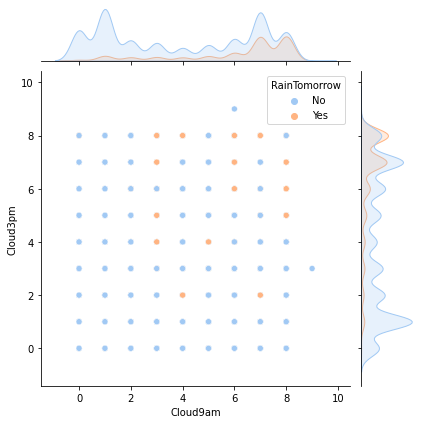

In [7]:
sns.jointplot(x='Cloud9am',y='Cloud3pm',data=data,hue='RainTomorrow',palette='pastel')

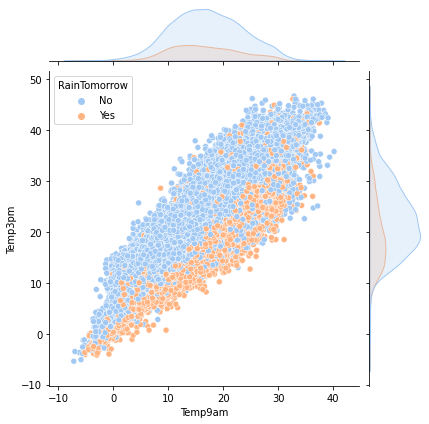

In [8]:
sns.jointplot(x='Temp9am',y='Temp3pm',data=data,hue='RainTomorrow',palette='pastel')

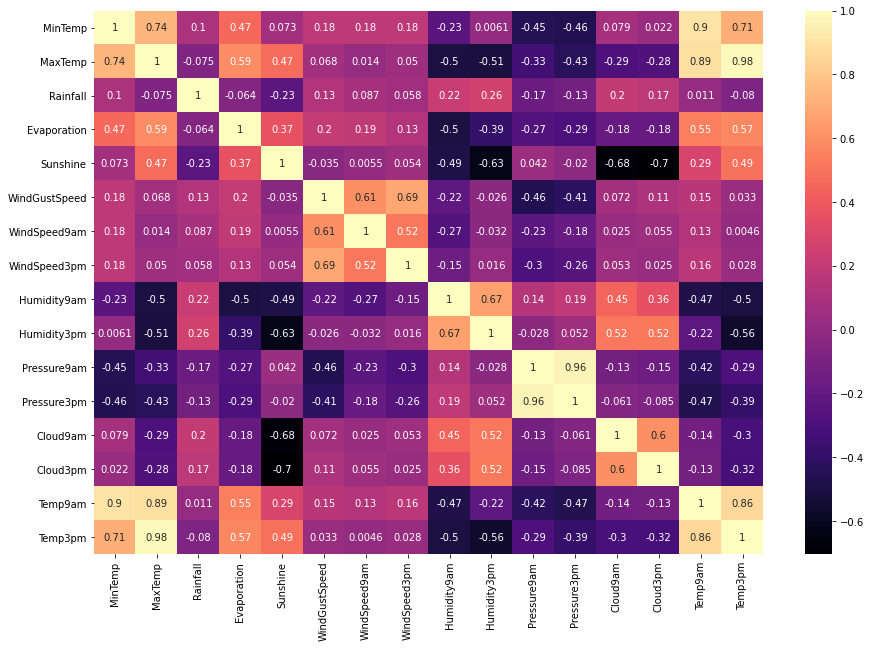

In [10]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,cmap='magma')

In [7]:
def fillna(min):
  if(np.isnan(min[0]) and not(np.isnan(min[1]))):
    min[0] = min[1]
    return min
  return min

In [8]:
data[['MinTemp','Temp9am']] = data[['MinTemp','Temp9am']].apply(fillna,result_type = 'expand',axis = 1)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        144286 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [9]:
data[['MaxTemp','Temp3pm']] = data[['MaxTemp','Temp9am']].apply(fillna,result_type = 'expand',axis = 1)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        145460 non-null  float64
 3   MaxTemp        144286 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 <a list of 49 Text major ticklabel objects>)

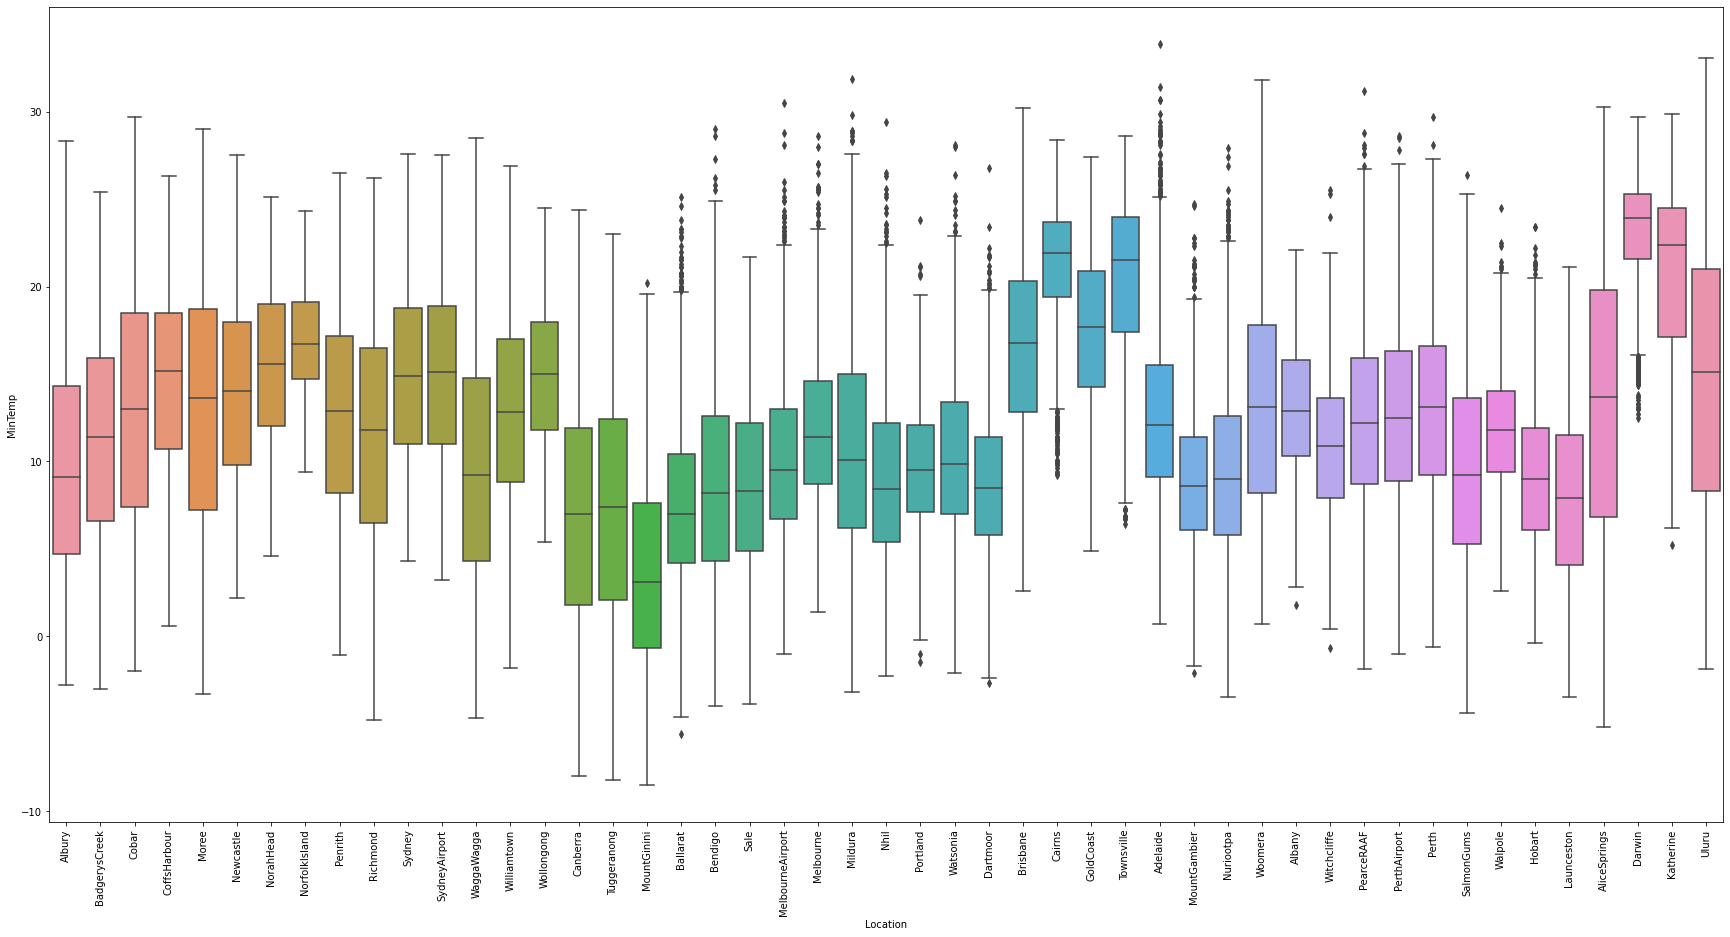

In [16]:
plt.figure(figsize=(30,15))
sns.boxplot(x='Location',y = 'MinTemp',data=data)
plt.xticks(rotation = 90)

In [10]:
gb = data.groupby('Location')

In [11]:
medbyloc =gb.median()['MinTemp'].to_dict()

In [12]:
medbyloc

{'Adelaide': 12.1,
 'Albany': 12.9,
 'Albury': 9.1,
 'AliceSprings': 13.7,
 'BadgerysCreek': 11.4,
 'Ballarat': 7.0,
 'Bendigo': 8.2,
 'Brisbane': 16.8,
 'Cairns': 21.9,
 'Canberra': 7.0,
 'Cobar': 13.0,
 'CoffsHarbour': 15.2,
 'Dartmoor': 8.5,
 'Darwin': 23.9,
 'GoldCoast': 17.7,
 'Hobart': 9.0,
 'Katherine': 22.4,
 'Launceston': 7.9,
 'Melbourne': 11.4,
 'MelbourneAirport': 9.5,
 'Mildura': 10.1,
 'Moree': 13.6,
 'MountGambier': 8.6,
 'MountGinini': 3.1,
 'Newcastle': 14.0,
 'Nhil': 8.4,
 'NorahHead': 15.6,
 'NorfolkIsland': 16.7,
 'Nuriootpa': 9.0,
 'PearceRAAF': 12.2,
 'Penrith': 12.9,
 'Perth': 13.1,
 'PerthAirport': 12.5,
 'Portland': 9.5,
 'Richmond': 11.8,
 'Sale': 8.3,
 'SalmonGums': 9.25,
 'Sydney': 14.9,
 'SydneyAirport': 15.1,
 'Townsville': 21.5,
 'Tuggeranong': 7.4,
 'Uluru': 15.1,
 'WaggaWagga': 9.2,
 'Walpole': 11.8,
 'Watsonia': 9.850000000000001,
 'Williamtown': 12.8,
 'Witchcliffe': 10.9,
 'Wollongong': 15.0,
 'Woomera': 13.1}

In [13]:
def fillna(x):
  if(np.isnan(x[0])):
    #print('nan')
    x[0] = medbyloc[x[1]]

  return x

In [14]:
 data[['MinTemp','Location']]= data[['MinTemp','Location']].apply(fillna,result_type = 'expand',axis = 1)

In [15]:
medbyloc =gb.median()['MaxTemp'].to_dict()
medbyloc

{'Adelaide': 21.7,
 'Albany': 19.9,
 'Albury': 21.9,
 'AliceSprings': 29.9,
 'BadgerysCreek': 23.25,
 'Ballarat': 16.9,
 'Bendigo': 20.6,
 'Brisbane': 26.7,
 'Cairns': 29.7,
 'Canberra': 20.4,
 'Cobar': 25.9,
 'CoffsHarbour': 24.0,
 'Dartmoor': 18.1,
 'Darwin': 32.8,
 'GoldCoast': 26.0,
 'Hobart': 17.3,
 'Katherine': 35.0,
 'Launceston': 18.45,
 'Melbourne': 19.5,
 'MelbourneAirport': 19.1,
 'Mildura': 24.0,
 'Moree': 27.2,
 'MountGambier': 18.4,
 'MountGinini': 11.6,
 'Newcastle': 23.3,
 'Nhil': 21.3,
 'NorahHead': 22.5,
 'NorfolkIsland': 21.7,
 'Nuriootpa': 20.4,
 'PearceRAAF': 25.1,
 'Penrith': 24.0,
 'Perth': 23.9,
 'PerthAirport': 24.5,
 'Portland': 16.9,
 'Richmond': 23.9,
 'Sale': 19.4,
 'SalmonGums': 23.5,
 'Sydney': 22.8,
 'SydneyAirport': 23.0,
 'Townsville': 29.7,
 'Tuggeranong': 20.2,
 'Uluru': 31.1,
 'WaggaWagga': 22.5,
 'Walpole': 19.9,
 'Watsonia': 19.7,
 'Williamtown': 23.5,
 'Witchcliffe': 20.7,
 'Wollongong': 21.3,
 'Woomera': 25.9}

In [16]:
 data[['MaxTemp','Location']]= data[['MaxTemp','Location']].apply(fillna,result_type = 'expand',axis = 1)

In [17]:
data.dropna(subset = ['RainTomorrow'], inplace= True)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        142193 non-null  float64
 3   MaxTemp        142193 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [18]:
gb = data.groupby('WindGustDir')

In [19]:
medbywind = gb.median()['WindGustSpeed'].to_dict()

In [20]:
def fillna(x):
  if(np.isnan(x[0]) and not(np.isnan(x[1]))):
    #print('nan')
    x[0] = medbywind[x[1]]

  return x

In [21]:
data[['WindGustSpeed','WindGustDir']]= data[['WindGustSpeed','WindGustDir']].apply(fillna,result_type = 'expand',axis = 1)

In [46]:
data[data['WindGustSpeed'].isnull()]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
64,2009-02-03,Albury,21.5,21.5,0.0,NaN,NaN,NaN,NaN,N,NaN,13.0,9.0,51.0,21.0,1009.2,1005.7,NaN,NaN,27.2,27.2,No,No
65,2009-02-04,Albury,21.7,21.7,0.0,NaN,NaN,NaN,NaN,NaN,NaN,11.0,11.0,53.0,26.0,1008.8,1004.7,NaN,NaN,25.5,25.5,No,No
458,2010-03-04,Albury,15.1,15.1,0.0,NaN,NaN,NaN,NaN,SE,S,7.0,11.0,70.0,35.0,1014.2,1009.8,NaN,NaN,20.1,20.1,No,No
1058,2011-11-24,Albury,10.8,10.8,0.0,NaN,NaN,NaN,NaN,SE,NaN,19.0,NaN,44.0,NaN,1024.5,NaN,NaN,NaN,17.2,17.2,No,Yes
1059,2011-11-25,Albury,15.0,15.0,11.0,NaN,NaN,NaN,NaN,SSE,NaN,11.0,NaN,99.0,NaN,1020.1,NaN,8.0,NaN,15.0,15.0,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145087,2016-06-18,Uluru,8.7,8.7,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.0,46.0,1019.7,1016.8,1.0,3.0,12.3,12.3,No,No
145088,2016-06-19,Uluru,3.4,3.4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.0,40.0,1020.3,1017.3,NaN,NaN,8.2,8.2,No,No
145089,2016-06-20,Uluru,2.2,2.2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.0,23.0,1017.4,1014.1,NaN,NaN,8.5,8.5,No,No
145090,2016-06-21,Uluru,7.8,7.8,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.0,25.0,1013.9,1011.5,5.0,8.0,12.3,12.3,No,No


In [22]:
mean = data['WindGustSpeed'].mean()

In [23]:
def fill(x):
  if(np.isnan(x)):
    return mean
  return x

In [24]:
data['WindGustSpeed'] = data['WindGustSpeed'].apply(fill)

In [25]:
mean =data['WindSpeed9am'].mean()
data['WindSpeed9am'] = data['WindSpeed9am'].apply(fill)

In [26]:
mean =data['WindSpeed3pm'].mean()
data['WindSpeed3pm'] = data['WindSpeed3pm'].apply(fill)

In [27]:
mean =data['Humidity9am'].mean()
data['Humidity9am'] = data['Humidity9am'].apply(fill)

In [28]:
mean =data['Humidity3pm'].mean()
data['Humidity3pm'] = data['Humidity3pm'].apply(fill)

In [67]:
data[data['Pressure3pm'].isnull()]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
1058,2011-11-24,Albury,10.8,10.8,0.0,NaN,NaN,NaN,39.984292,SE,NaN,19.0,18.637576,44.0,51.482606,1024.5,NaN,NaN,NaN,17.2,17.2,No,Yes
1059,2011-11-25,Albury,15.0,15.0,11.0,NaN,NaN,NaN,39.984292,SSE,NaN,11.0,18.637576,99.0,51.482606,1020.1,NaN,8.0,NaN,15.0,15.0,Yes,Yes
1060,2011-11-26,Albury,15.0,15.0,44.0,NaN,NaN,NaN,39.984292,NE,NaN,13.0,18.637576,83.0,51.482606,1006.2,NaN,3.0,NaN,20.0,20.0,Yes,Yes
1061,2011-11-27,Albury,15.0,15.0,14.0,NaN,NaN,NaN,39.984292,W,NaN,15.0,18.637576,76.0,51.482606,1009.4,NaN,7.0,NaN,16.6,16.6,Yes,No
3040,2009-01-01,BadgerysCreek,13.3,13.3,0.0,NaN,NaN,W,61.000000,NNE,NaN,11.0,18.637576,67.0,51.482606,1005.6,NaN,NaN,NaN,21.0,21.0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143094,2015-04-30,Katherine,11.0,11.0,0.0,6.8,NaN,NaN,39.984292,SE,NaN,13.0,18.637576,23.0,78.000000,1015.3,NaN,0.0,0.0,22.5,22.5,No,No
143358,2016-01-19,Katherine,25.2,25.2,0.2,5.2,NaN,NaN,39.984292,SW,NaN,7.0,18.637576,72.0,51.482606,1012.0,NaN,2.0,NaN,29.5,29.5,No,Yes
143463,2016-05-03,Katherine,23.0,23.0,4.4,5.6,NaN,E,31.000000,SSE,NaN,9.0,18.637576,84.0,51.482606,1013.7,NaN,8.0,NaN,27.0,27.0,Yes,No
143539,2016-07-18,Katherine,8.0,8.0,0.0,6.8,NaN,E,35.000000,SE,NaN,7.0,18.637576,53.0,51.482606,1015.5,NaN,0.0,NaN,17.5,17.5,No,No


In [29]:
def fillna(min):
  if(np.isnan(min[0]) and not(np.isnan(min[1]))):
    min[0] = min[1]
    return min
  return min

In [30]:
data[['Pressure3pm','Pressure9am']] = data[['Pressure3pm','Pressure9am']].apply(fillna,result_type = 'expand',axis = 1)

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        142193 non-null  float64
 3   MaxTemp        142193 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  142193 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   142193 non-null  float64
 12  WindSpeed3pm   142193 non-null  float64
 13  Humidity9am    142193 non-null  float64
 14  Humidity3pm    142193 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128402 non-null  float64
 17  Cloud9am       88536 non-null

In [31]:
mean = data.groupby('Location').mean()['Pressure3pm'].to_dict()

In [32]:
def fillna(x):
  if(np.isnan(x[0])):
    #print('nan')
    x[0] = mean[x[1]]

  return x

In [33]:
data[['Pressure3pm','Location']]= data[['Pressure3pm','Location']].apply(fillna,result_type = 'expand',axis = 1)

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        142193 non-null  float64
 3   MaxTemp        142193 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  142193 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   142193 non-null  float64
 12  WindSpeed3pm   142193 non-null  float64
 13  Humidity9am    142193 non-null  float64
 14  Humidity3pm    142193 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    130412 non-null  float64
 17  Cloud9am       88536 non-null

In [34]:
mean =data['Pressure3pm'].mean()
data['Pressure3pm'] = data['Pressure3pm'].apply(fill)

In [35]:
data.drop(toDrop,axis = 1, inplace = True)
data

,Date,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,RainTomorrow
0,2008-12-01,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.1,No
1,2008-12-02,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1007.8,No
2,2008-12-03,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1008.7,No
3,2008-12-04,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1012.8,No
4,2008-12-05,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1006.0,No
...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,3.5,21.8,0.0,31.0,15.0,13.0,59.0,27.0,1021.2,No
145455,2017-06-21,2.8,23.4,0.0,31.0,13.0,11.0,51.0,24.0,1020.3,No
145456,2017-06-22,3.6,25.3,0.0,22.0,13.0,9.0,56.0,21.0,1019.1,No
145457,2017-06-23,5.4,26.9,0.0,37.0,9.0,9.0,53.0,24.0,1016.8,No


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   MinTemp        142193 non-null  float64
 2   MaxTemp        142193 non-null  float64
 3   Rainfall       140787 non-null  float64
 4   WindGustSpeed  142193 non-null  float64
 5   WindSpeed9am   142193 non-null  float64
 6   WindSpeed3pm   142193 non-null  float64
 7   Humidity9am    142193 non-null  float64
 8   Humidity3pm    142193 non-null  float64
 9   Pressure3pm    142193 non-null  float64
 10  RainTomorrow   142193 non-null  object 
dtypes: float64(9), object(2)
memory usage: 13.0+ MB


In [37]:
data['Date'] =pd.to_datetime(data['Date'])

In [38]:
data['Year'] = data['Date'].dt.year

In [39]:
data['Month'] = data['Date'].dt.month
data['Dayofmonth'] = data['Date'].dt.day

In [40]:
data

,Date,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,RainTomorrow,Year,Month,Dayofmonth
0,2008-12-01,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.1,No,2008,12,1
1,2008-12-02,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1007.8,No,2008,12,2
2,2008-12-03,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1008.7,No,2008,12,3
3,2008-12-04,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1012.8,No,2008,12,4
4,2008-12-05,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1006.0,No,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,3.5,21.8,0.0,31.0,15.0,13.0,59.0,27.0,1021.2,No,2017,6,20
145455,2017-06-21,2.8,23.4,0.0,31.0,13.0,11.0,51.0,24.0,1020.3,No,2017,6,21
145456,2017-06-22,3.6,25.3,0.0,22.0,13.0,9.0,56.0,21.0,1019.1,No,2017,6,22
145457,2017-06-23,5.4,26.9,0.0,37.0,9.0,9.0,53.0,24.0,1016.8,No,2017,6,23


In [41]:
data.fillna(0.0,inplace=True)

In [42]:
X = data.drop(['Date','RainTomorrow'],axis=1)
y = data['RainTomorrow']


In [43]:
from sklearn.model_selection import train_test_split



In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  classification_report,confusion_matrix

In [108]:
forest = RandomForestClassifier(n_estimators =100)

In [109]:
forest.fit(X_train,y_train)
pred = forest.predict(X_test)

In [110]:
print(confusion_matrix(y_test,pred))
print("\n")
print(classification_report(y_test,pred))

[[34691  1775]
 [ 5315  5143]]


              precision    recall  f1-score   support

          No       0.87      0.95      0.91     36466
         Yes       0.74      0.49      0.59     10458

    accuracy                           0.85     46924
   macro avg       0.81      0.72      0.75     46924
weighted avg       0.84      0.85      0.84     46924



In [111]:
forest2 = RandomForestClassifier(n_estimators =100,criterion='entropy')

In [112]:
forest2.fit(X_train,y_train)


In [114]:
pred = forest2.predict(X_test)

In [115]:
print(confusion_matrix(y_test,pred))
print("\n")
print(classification_report(y_test,pred))

[[34719  1747]
 [ 5355  5103]]


              precision    recall  f1-score   support

          No       0.87      0.95      0.91     36466
         Yes       0.74      0.49      0.59     10458

    accuracy                           0.85     46924
   macro avg       0.81      0.72      0.75     46924
weighted avg       0.84      0.85      0.84     46924



In [116]:
from sklearn.model_selection import GridSearchCV

In [119]:
params = dict(max_features = ['sqrt','log2',0.2,0.4,0.6,0.8,1])
grid_forest = GridSearchCV(RandomForestClassifier(),params,verbose=3)

In [120]:
grid_forest.fit(X_train,y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] max_features=sqrt ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................... max_features=sqrt, score=0.850, total=  16.3s
[CV] max_features=sqrt ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.3s remaining:    0.0s


[CV] ................... max_features=sqrt, score=0.845, total=  16.4s
[CV] max_features=sqrt ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   32.8s remaining:    0.0s


[CV] ................... max_features=sqrt, score=0.851, total=  16.5s
[CV] max_features=sqrt ...............................................
[CV] ................... max_features=sqrt, score=0.849, total=  16.8s
[CV] max_features=sqrt ...............................................
[CV] ................... max_features=sqrt, score=0.845, total=  16.5s
[CV] max_features=log2 ...............................................
[CV] ................... max_features=log2, score=0.849, total=  16.8s
[CV] max_features=log2 ...............................................
[CV] ................... max_features=log2, score=0.844, total=  17.2s
[CV] max_features=log2 ...............................................
[CV] ................... max_features=log2, score=0.850, total=  17.2s
[CV] max_features=log2 ...............................................
[CV] ................... max_features=log2, score=0.849, total=  17.0s
[CV] max_features=log2 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed: 12.3min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [121]:
grid_forest.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [122]:
grid_forest.best_score_

0.8479463061971547

In [123]:
pred = grid_forest.predict(X_test)

In [124]:
print(confusion_matrix(y_test,pred))
print("\n")
print(classification_report(y_test,pred))

[[34726  1740]
 [ 5311  5147]]


              precision    recall  f1-score   support

          No       0.87      0.95      0.91     36466
         Yes       0.75      0.49      0.59     10458

    accuracy                           0.85     46924
   macro avg       0.81      0.72      0.75     46924
weighted avg       0.84      0.85      0.84     46924



In [125]:
forest3 = RandomForestClassifier(n_estimators=1000,max_features='sqrt')

In [127]:
forest3.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [128]:
pred = forest3.predict(X_test)

In [1]:
print(confusion_matrix(y_test,pred))
print("\n")
print(classification_report(y_test,pred))

NameError: ignored

In [45]:
from imblearn.over_sampling import SMOTE

In [46]:
oversampling = SMOTE()

In [48]:
X, y = oversampling.fit_resample(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [49]:
X.shape

(220632, 12)

In [50]:
y.shape

(220632,)

In [53]:
X

array([[ 1.34000000e+01,  2.29000000e+01,  6.00000000e-01, ...,
         2.00800000e+03,  1.20000000e+01,  1.00000000e+00],
       [ 7.40000000e+00,  2.51000000e+01,  0.00000000e+00, ...,
         2.00800000e+03,  1.20000000e+01,  2.00000000e+00],
       [ 1.29000000e+01,  2.57000000e+01,  0.00000000e+00, ...,
         2.00800000e+03,  1.20000000e+01,  3.00000000e+00],
       ...,
       [ 6.81022182e+00,  1.25614996e+01,  1.02555456e+00, ...,
         2.01192334e+03,  6.51277728e+00,  2.20000000e+01],
       [ 5.60735887e+00,  1.32874244e+01,  6.85887093e-01, ...,
         2.01208896e+03,  7.30367943e+00,  5.08896170e+00],
       [-3.00000000e-01,  3.85835516e+00,  8.14119352e-01, ...,
         2.00900000e+03,  5.55764194e+00,  1.35129548e+01]])

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [55]:
forest = RandomForestClassifier(n_estimators =1000)

In [56]:
forest.fit(X_train,y_train)
pred = forest.predict(X_test)

In [57]:
print(confusion_matrix(y_test,pred))
print("\n")
print(classification_report(y_test,pred))

[[32775  3606]
 [ 3705 32723]]


              precision    recall  f1-score   support

          No       0.90      0.90      0.90     36381
         Yes       0.90      0.90      0.90     36428

    accuracy                           0.90     72809
   macro avg       0.90      0.90      0.90     72809
weighted avg       0.90      0.90      0.90     72809



In [58]:
forest3 = RandomForestClassifier(n_estimators=1000,max_features='sqrt')

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

In [60]:
pred = forest.predict(X_test)

In [61]:
print(confusion_matrix(y_test,pred))
print("\n")
print(classification_report(y_test,pred))

[[35236  1205]
 [ 1251 35117]]


              precision    recall  f1-score   support

          No       0.97      0.97      0.97     36441
         Yes       0.97      0.97      0.97     36368

    accuracy                           0.97     72809
   macro avg       0.97      0.97      0.97     72809
weighted avg       0.97      0.97      0.97     72809



In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=4)

In [64]:
pred = forest.predict(X_test)

In [65]:
print(confusion_matrix(y_test,pred))
print("\n")
print(classification_report(y_test,pred))

[[35228  1217]
 [ 1262 35102]]


              precision    recall  f1-score   support

          No       0.97      0.97      0.97     36445
         Yes       0.97      0.97      0.97     36364

    accuracy                           0.97     72809
   macro avg       0.97      0.97      0.97     72809
weighted avg       0.97      0.97      0.97     72809



In [66]:
forest3 = RandomForestClassifier(n_estimators=1000,max_features='sqrt')

In [67]:
forest3.fit(X_train,y_train)
pred = forest3.predict(X_test)

In [68]:
print(confusion_matrix(y_test,pred))
print("\n")
print(classification_report(y_test,pred))

[[32827  3618]
 [ 3772 32592]]


              precision    recall  f1-score   support

          No       0.90      0.90      0.90     36445
         Yes       0.90      0.90      0.90     36364

    accuracy                           0.90     72809
   macro avg       0.90      0.90      0.90     72809
weighted avg       0.90      0.90      0.90     72809

